In [11]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Create the connection
con = sqlite3.connect(r'C:\Users\garfi\PycharmProjects\Sandbox\src\Sox.db')
# create the dataframe from a query
df = pd.read_sql_query("SELECT * FROM test_module", con)

In [4]:
df

,TestId,Section,Cycle,Process,Control,Tester,Reviewer,Status,Effect,TestData,Due,DateComplete
0,1,MRC-9975 - ITS - Global,1,GLOBAL AM-3.7,1221_GAM _3.7 GL_SYN_Completeness & Accuracy o...,1,2,0,0,Completeness & Accuracy of Reports Testing Att...,06/21/2020,
1,2,MRC-9975 - ITS - Global,Elevated Privileges,1,1221_GAM _4.4 GL_SYN_Privileged Access -Monito...,1,2,1,1,Privileged Access -Monitoring (Permanent Acces...,06/21/2020,06/17/2020
2,3,MRC-9975 - ITS - Global,1,GLOBAL AM-3.6,1221_GAM _3.6 GL_SYN_Cross-System Review,2,1,1,1,Cross-System Review Testing Attributes: Â (C/...,09/09/2016,09/08/2016
3,4,MRC-9975 - ITS - Global,1,GLOBAL AM-2.2,1221_GAM _2.2 GL_SYN_Terminations/Transfers - ...,2,1,0,1,Terminations/Transfers - Â Weekly Review Testi...,09/02/2016,09/02/2016
4,5,MRC-9975 - ITS - Global,1,GLOBAL AM - 4.3,1221_GAM _4.3 GL_SYN_Privileged Access -Monito...,1,2,1,2,Privileged Access -Monitoring (Temporary Acces...,12/04/16,12/04/16
5,6,MRC-9975 - ITS - Global,1,Global AM-1.2,1221_GAM _1.2 GL_SYN_Authorization Verification,1,1,1,1,Authorization Verification Testing Attributes:...,12/04/2016,12/03/2016


In [15]:
# replace values with strings
df['Tester'].replace('0', 'TBD',inplace=True)
df['Tester'].replace('1', 'Edouard Roland',inplace=True)
df['Tester'].replace('2', 'Garfied Vernon',inplace=True)

df['Reviewer'].replace('0', 'TBD',inplace=True)
df['Reviewer'].replace('1', 'Edouard Roland',inplace=True)
df['Reviewer'].replace('2', 'Garfied Vernon',inplace=True)

df['Status'].replace('0', 'Open',inplace=True)
df['Status'].replace('1', 'Completed',inplace=True)
df['Status'].replace('2', 'In Progress',inplace=True)

df['Effect'].replace('0', '',inplace=True)
df['Effect'].replace('1', 'Pass',inplace=True)
df['Effect'].replace('2', 'Fail',inplace=True)

df['Cycle'].replace('0', '',inplace=True)
df['Cycle'].replace('1', 'Global Access Management',inplace=True)
df['Cycle'].replace('2', 'Change Management',inplace=True)

df['DateComplete'] = pd.to_datetime(df['DateComplete'], errors = 'coerce')


df

,TestId,Section,Cycle,Process,Control,Tester,Reviewer,Status,Effect,TestData,Due,DateComplete
0,1,MRC-9975 - ITS - Global,Global Access Management,GLOBAL AM-3.7,1221_GAM _3.7 GL_SYN_Completeness & Accuracy o...,Edouard Roland,Garfied Vernon,Open,,Completeness & Accuracy of Reports Testing Att...,06/21/2020,NaT
1,2,MRC-9975 - ITS - Global,Elevated Privileges,1,1221_GAM _4.4 GL_SYN_Privileged Access -Monito...,Edouard Roland,Garfied Vernon,Completed,Pass,Privileged Access -Monitoring (Permanent Acces...,06/21/2020,2020-06-17
2,3,MRC-9975 - ITS - Global,Global Access Management,GLOBAL AM-3.6,1221_GAM _3.6 GL_SYN_Cross-System Review,Garfied Vernon,Edouard Roland,Completed,Pass,Cross-System Review Testing Attributes: Â (C/...,09/09/2016,2016-09-08
3,4,MRC-9975 - ITS - Global,Global Access Management,GLOBAL AM-2.2,1221_GAM _2.2 GL_SYN_Terminations/Transfers - ...,Garfied Vernon,Edouard Roland,Open,Pass,Terminations/Transfers - Â Weekly Review Testi...,09/02/2016,2016-09-02
4,5,MRC-9975 - ITS - Global,Global Access Management,GLOBAL AM - 4.3,1221_GAM _4.3 GL_SYN_Privileged Access -Monito...,Edouard Roland,Garfied Vernon,Completed,Fail,Privileged Access -Monitoring (Temporary Acces...,12/04/16,2016-12-04
5,6,MRC-9975 - ITS - Global,Global Access Management,Global AM-1.2,1221_GAM _1.2 GL_SYN_Authorization Verification,Edouard Roland,Edouard Roland,Completed,Pass,Authorization Verification Testing Attributes:...,12/04/2016,2016-12-03


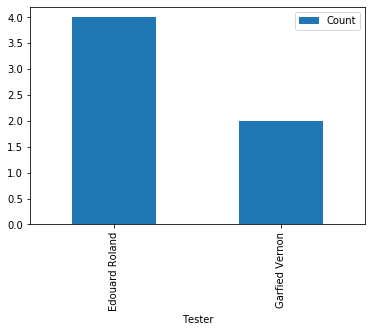

In [43]:
dfTester = df.groupby('Tester').Tester.count().reset_index(name="Count")
dfReviewer = df.groupby('Reviewer').Reviewer.count().reset_index(name="Count")
dfEffect = df.groupby('Effect').Effect.count().reset_index(name="Count")
dfStatus = df.groupby('Status').Status.count().reset_index(name="Count")


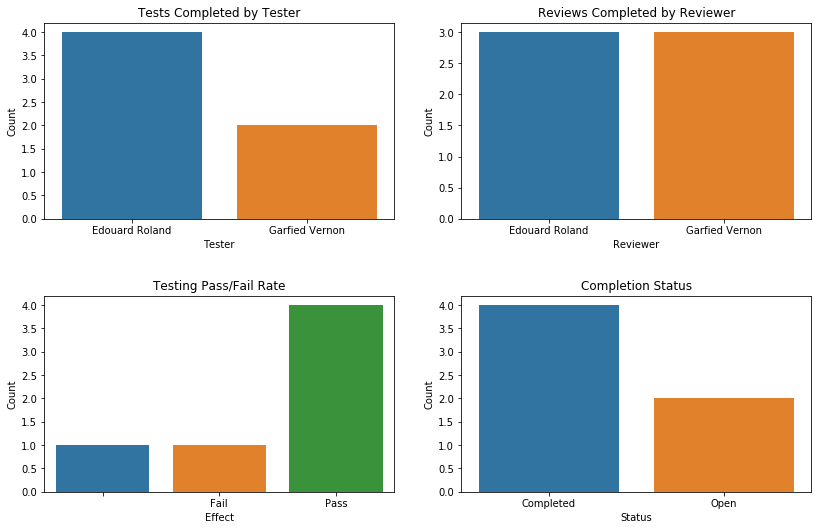

In [45]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize = (12, 8))

sns.barplot(x='Tester', y='Count', data=dfTester, ax=axs[0,0])
sns.barplot(x='Reviewer', y='Count', data=dfReviewer, ax=axs[0,1])
sns.barplot(x='Effect', y='Count', data=dfEffect, ax=axs[1,0])
sns.barplot(x='Status', y='Count', data=dfStatus, ax=axs[1,1])

axs[0,0].title.set_text('Tests Completed by Tester')
axs[0,1].title.set_text('Reviews Completed by Reviewer')
axs[1,0].title.set_text('Testing Pass/Fail Rate')
axs[1,1].title.set_text('Completion Status')

fig.tight_layout(pad=3.0)
plt.close(2)
plt.close(3)
plt.close(4)
plt.close(5)

